<img style="float:top,right" src="Logo.png">

<br><br>

# Welcome to the KinMS introduction  

<br><br>

### Here you will learn how to import and use KinMS to generate mock interferometric data cubes and gain a better understanding of using the functionalities within the package.

---

Copyright (C) 2016, Timothy A. Davis
E-mail: DavisT -at- cardiff.ac.uk, zabelnj -at- cardiff.ac.uk, dawsonj5 -at- cardiff.ac.uk

---


This tutorial aims at getting you up and running with KinMS! To start you will need to download the KinMSpy code and have it in your python path. 

The simplest way to do this is to call `pip install kinms`

Once you have completed/understood this tutorial you may want to check out the tutorial on galaxy fitting with KinMS!

### HOUSEKEEPING

Firstly, we want to import the KinMS package and instantiate the class so that we can freely use it throughout this example notebook

In [1]:
from kinms import KinMS

Secondly we're going to need some more basic Python packages as well as the premade colourmap for viewing velocity maps found in $\texttt{sauron-colormap}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from kinms.utils.sauron_colormap import sauron

---

## Example 1.

### Lets try making a data cube by providing the class with the physical attributes necessary for describing a simple exponential disk. 

First lets start by creating a surface brightness profile which decays radially

In [3]:
scalerad = 10 # arcseconds
radius = np.arange(0, 1000, 0.1) # radius vector in arcseconds
sbprof = np.exp(-radius / scalerad)

Next, lets make the velocity profile, assuming an arctan form.

In [4]:
vel = (210) * (2/np.pi)*np.arctan(radius)  # Scaling the maximum velocity to 210 km/s

Although not necessary, we may also wish to provide our class with the position angle and inclination angle of our galaxy. We do that here by defining $\theta_\texttt{pos}$ and $\phi_\texttt{inc}$ respectively

In [5]:
pos = 270 # degrees
inc= 45   # degrees

Now we need to define the properties of the data cube which we would like to return, including the physical dimensions, channel width, and beam size

In [12]:
xsize = 128 # arcsec
ysize = 128 # arcsec
vsize = 700 # km/s
cellsize = 1 # arcsec/pixel
dv = 10 # km/s/channel
beamsize = [4, 4, 0] # arcsec, arcsec, degrees

Finally, we provide all of the parameters defined above to the class which returns the modelled data cube. 

**Note**: If you wish, the user can use the "verbose = True" argument to see useful information and feedback on the input parameters while generating the cube. We show an example of this behaviour below

In [13]:
kin = KinMS(xsize, ysize, vsize, cellsize, dv, beamSize = beamsize, inc = inc, sbProf = sbprof,
             sbRad = radius, velProf = vel, posAng = pos, verbose = True)  



*** Hello and welcome to KinMSpy ***
_____________________________________
 
Setting user defined variables to: 

xs = 128
ys = 128
vs = 700
cellSize = 1
dv = 10
inc = [35]
posAng = [90]
sbProf = user defined array of length 10000
_____________________________________
 
Setting default values to: 

inClouds = []
vLOS_clouds = []
massDist = []
seed = [100 101 102 103]
intFlux = 0
vSys = 0
phaseCent = [0 0]
vOffset = 0
vPhaseCent = [0 0]
restFreq = 230542000000.0
nSamps = 500000
vPosAng = []
gasSigma = [0]
diskThick = [0]
inflowVel = [0]
sbRad = default array of length 10000
velRad = []
velProf = default array of length 10000
_____________________________________
 
Setting options to: 

fixSeed = False
cleanOut = False
returnClouds = False
huge_beam = False
verbose = True
inClouds_given = False
_____________________________________



You can then generate the model cube using the following:

In [14]:
model=kin.model_cube()

Generating cloudlets, Using a thin disc assumption.
_____________________________________

 *** Cube successfully created ***


If you do not want to see the printed information (for example during MCMC fitting routines), it is easy to switch off by either not using the verbose argument or setting it to False explicitly.

In [15]:
kin.verbose=False

A similar behaviour exists for outputting plots of the generated cube, which can also be toggled on and off. Plots are created by passing the "toplot = True" argument to model_cube. We show this behaviour below

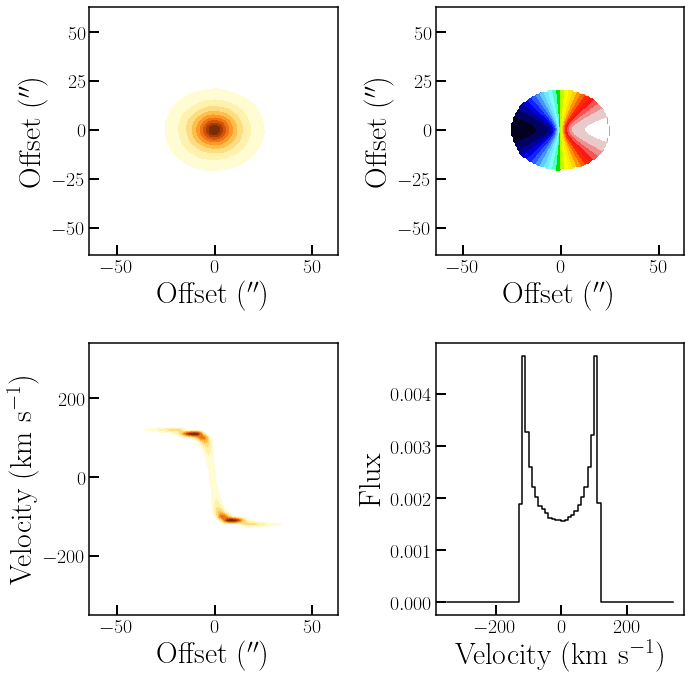

In [16]:
cube = kin.model_cube(toplot=True)        

Next we're going to demonstrate the use of $\texttt{inclouds}$, which allows the user to pass specific cloudlet positions and their associated velocities to $\texttt{KinMS}$. These particles could be generated by some other means (e.g. if you are making mock observations of a simulation), or be the output from some analytic function.

As in the first example, we need to set up our cube parameters

In [18]:
xsize = 128 # arcsec
ysize = 128 # arcsec
vsize = 1400 # km/s
cellsize = 1 # arcsec/pixel
dv = 10 # km/s/channel
beamsize = [4, 4, 0] # arcsec, arcsec, degrees
inc = 35 # degrees
intflux = 30 # Jy km/s
posang = 90 # degrees

Now we can specify the x,y and z positions of the cloudlets we wish to pass to $\texttt{KinMS}$ as an (n,3) vector. These should be specified in arcseconds around some central location.

In [19]:
inclouds = np.array([[40, 0, 0], [39.5075, 6.25738, 0], [38.0423, 12.3607, 0.00000], [35.6403, 18.1596, 0],
                     [32.3607, 23.5114, 0], [28.2843, 28.2843, 0], [23.5114, 32.3607, 0], [18.1596, 35.6403, 0],
                     [12.3607, 38.0423, 0], [6.25737, 39.5075, 0], [0, 40, 0], [-6.25738, 39.5075, 0],
                     [-12.3607, 38.0423, 0], [-18.1596, 35.6403, 0], [-23.5114, 32.3607, 0],
                     [-28.2843, 28.2843, 0], [-32.3607, 23.5114, 0], [-35.6403, 18.1596, 0],
                     [-38.0423, 12.3607, 0], [-39.5075, 6.25738, 0], [-40, 0, 0], [-39.5075, -6.25738, 0],
                     [-38.0423,-12.3607, 0], [-35.6403, -18.1596, 0], [-32.3607, -23.5114, 0], [-28.2843, -28.2843, 0],
                     [-23.5114, -32.3607, 0], [-18.1596, -35.6403, 0], [-12.3607,-38.0423, 0], [-6.25738, -39.5075, 0],
                     [0, -40, 0], [6.25738, -39.5075, 0], [12.3607, -38.0423, 0], [18.1596, -35.6403, 0],
                     [23.5114, -32.3607, 0], [28.2843, -28.2843, 0], [32.3607,-23.5114, 0],  [35.6403, -18.1596, 0],
                     [38.0423, -12.3607, 0], [39.5075, -6.25737, 0], [15, 15, 0], [-15, 15, 0],
                     [-19.8504, -2.44189, 0], [-18.0194, -8.67768, 0], [-14.2856, -13.9972, 0],
                     [-9.04344, -17.8386, 0], [-2.84630, -19.7964, 0], [3.65139, -19.6639, 0],
                     [9.76353, -17.4549, 0], [14.8447, -13.4028, 0], [18.3583, -7.93546, 0],
                     [19.9335, -1.63019, 0]])

Now we have a choice to make. If you are generating mock observations from a hydrodynamic simulation, lets say, then you already have full 3D velocity information, and you will want to supply the line-of-sight velocity for every resolution element. In this case you can pass the velocity information as vLOS_clouds - but you should make sure your input cloudlets have already been projected to the desired inclination.

Alternativly, perhaps you would like to input a circular velocity profile, and have KinMS handle the projection. Here we create a velocity profile with a few radial position anchors and linearly interpolate between them to get a full profile

In [20]:
x = np.arange(0, 100, 0.1)
velfunc = interpolate.interp1d([0, 0.5, 1, 3, 500], [0, 50, 100, 210, 210], kind = 'linear')
vel = velfunc(x)

Again, lets make a cube with all the specified parameters above

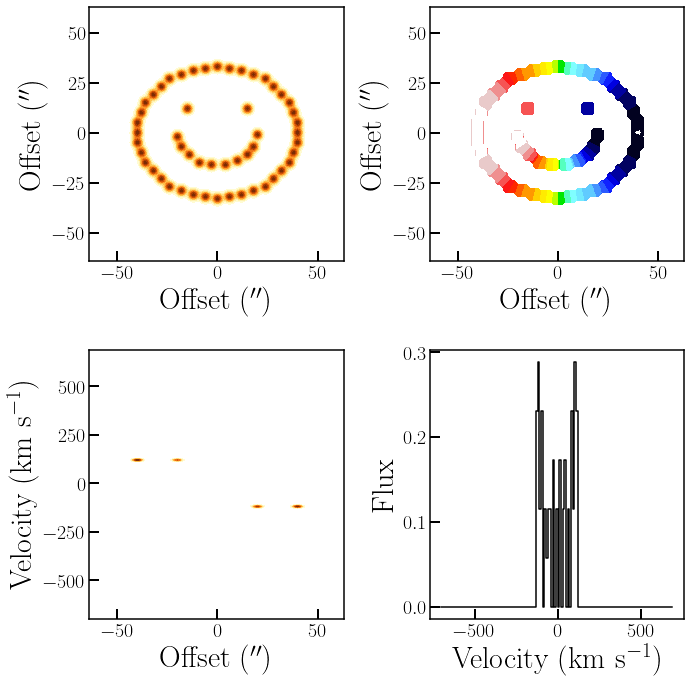

In [21]:
cube = KinMS(xsize, ysize, vsize, cellsize, dv, beamsize, inc, intFlux = intflux, inClouds = inclouds,
             velProf = vel, velRad = x, posAng = posang).model_cube(toplot = True)

---

## Example 3.

$\texttt{KinMS}$ can accomodate a variety of departures from simple orderly rotation. In this example we will demonstrate the creation of datacubes containing a galaxy with a non-zero thickness disk with a warp in the position angle across the radius of the disk.

As in the other examples, we need to set up our cube parameters

In [22]:
xsize = 128
ysize = 128
vsize = 1400
cellsize = 1
dv = 10
beamsize = 2
intflux = 30
fcent = 10
scalerad = 20
inc = 60
discthick=1.

# create an exponetial surface brightness profile and an arctan velocity curve
radius = np.arange(0, 100, 0.1)
sbprof = fcent * np.exp(-radius / scalerad)
vel = (210) * (2/np.pi)*np.arctan(radius)

Next we need to create an array of position angle values

In [23]:
posangfunc = interpolate.interp1d([0, 15, 50, 500], [270, 270, 300, 300], kind='linear')
posang = posangfunc(radius)

And lastly, we simply run KinMS to generate the final cube

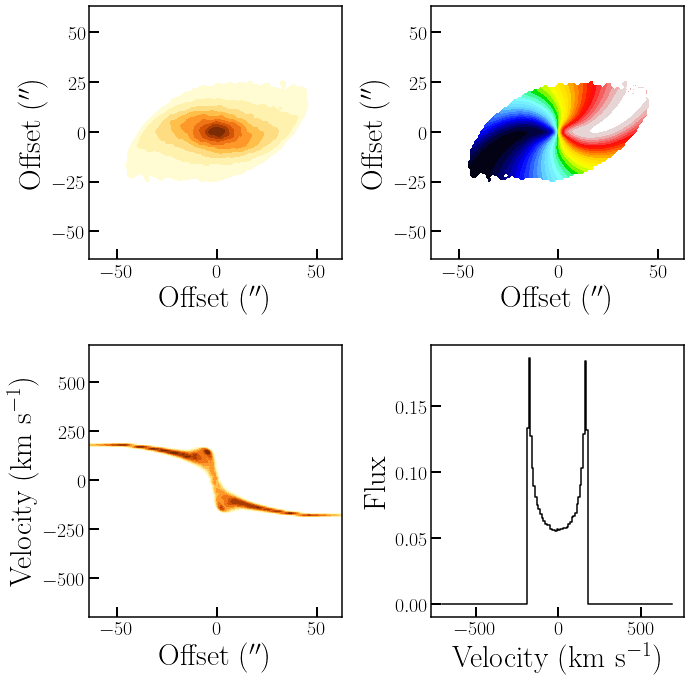

In [24]:
kin = KinMS(xsize, ysize, vsize, cellsize, dv, beamsize, inc, sbProf=sbprof, sbRad=radius, velProf=vel, intFlux=intflux,
                 posAng=posang,diskThick=discthick)
cube=kin.model_cube(toplot=True)

---

## Final notes

For a more in-depth exploration of the capabilities of $\texttt{KinMS}$, please check out the $\texttt{KinMS}$ testsuite in the GitHub repository!

You may also want to check out the [tutorial on galaxy fitting with KinMS](https://github.com/TimothyADavis/KinMSpy/blob/master/kinms/docs/KinMSpy_tutorial.ipynb)!